# Import Lib

In [464]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re

# Import Csv

In [466]:
chunksize = 10 ** 3  # Chunksize de 1000 lignes
filename = 'products.csv'
nan_rates = []

try:
    # Lecture du fichier CSV par chunks
    reader = pd.read_csv(filename, chunksize=chunksize, sep='\t')

    for chunk in reader:
        # Calculer le taux de NaN pour chaque chunk
        nan_rates.append(chunk.isna().mean(axis=0))

except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

# Calcul des taux moyens de remplissage des chunks
if nan_rates:
    inds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)

    # Sélection des colonnes à charger en fonction des taux de NaN
    cols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()

    # Chargement des données filtrées
    df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)
    df = df.drop(['url','creator','created_datetime','food_groups_tags','food_groups_en','states_tags','sodium_100g','states_en','last_image_datetime','last_modified_t','last_modified_datetime','created_t','last_modified_by','main_category_en','image_url','image_small_url','last_updated_t','last_image_t','brands_tags','last_updated_datetime','categories_en','categories_tags','countries_tags','countries_en'], axis=1)

    # Affichage de la première partie du dataframe pour vérifier
    print(df.head())

ParserError: Error tokenizing data. C error: Expected 206 fields in line 1537879, saw 234



/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/3644886759.py:24: DtypeWarning: Columns (0,50,52,56,58,88,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)


                     code      product_name   brands  \
0       00000000000000225    jeunes pousses  endives   
1  0000000000000207025004             Andrè      NaN   
2    00000000000003429145           L.casei      NaN   
3    00000000000026772226              Skyr   Danone   
4           0000000000017  Vitória crackers      NaN   

                                          categories  countries  \
0  Aliments et boissons à base de végétaux, Alime...  en:france   
1                                                NaN      en:de   
2                                                NaN      Spain   
3  Produits laitiers, Produits fermentés, Dessert...     France   
4                                                NaN     France   

                                    ingredients_text  \
0                                                NaN   
1                                                NaN   
2  Leche semidesnatada, azucar 6.9%, leche desnat...   
3                                   

# Information de base

In [468]:
df.info

<bound method DataFrame.info of                            code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3307654              9999999999            Duschgel - Iris        NaN   
3307655             99999999999        Sugo alle Melanzone  La Vialla   
3307656            999999999999       Test Product Product        MTR   
3307657           9999999999994  Light & Free SKYR A BOIRE        NaN   
3307658           9999999999999                 Salatgurke      Edeka   

                                                categories   countries  \
0        Aliments

In [469]:
df.head(5)

code      product_name   brands  \
0       00000000000000225    jeunes pousses  endives   
1  0000000000000207025004             Andrè      NaN   
2    00000000000003429145           L.casei      NaN   
3    00000000000026772226              Skyr   Danone   
4           0000000000017  Vitória crackers      NaN   

                                          categories  countries  \
0  Aliments et boissons à base de végétaux, Alime...  en:france   
1                                                NaN      en:de   
2                                                NaN      Spain   
3  Produits laitiers, Produits fermentés, Dessert...     France   
4                                                NaN     France   

                                    ingredients_text  \
0                                                NaN   
1                                                NaN   
2  Leche semidesnatada, azucar 6.9%, leche desnat...   
3                                                NaN   
4                                                NaN   

                                    ingredients_tags  \
0                                                NaN   
1                                                NaN   
2  en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...   
3                                                NaN   
4                                                NaN   

                           ingredients_analysis_tags serving_size  \
0                                                NaN          NaN   
1                                                NaN          NaN   
2  en:palm-oil-free,en:non-vegan,en:vegetarian-st...          NaN   
3                                                NaN          NaN   
4                                                NaN          NaN   

  serving_quantity  ... energy_100g fat_100g saturated-fat_100g  \
0              NaN  ...         NaN      NaN                NaN   
1              NaN  ...       690.0      2.0                2.0   
2              NaN  ...         NaN      1.4                0.9   
3              NaN  ...       238.0      0.2                0.1   
4              NaN  ...      1569.0      7.0               3.08   

  carbohydrates_100g sugars_100g fiber_100g proteins_100g salt_100g  \
0                NaN         NaN        NaN           NaN       NaN   
1               65.0        12.6        3.0           1.5       NaN   
2                9.8         9.8        NaN           2.7      0.10   
3                3.9         3.9        NaN          10.0      0.09   
4               70.1        15.0        NaN           7.8      1.40   

  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
0                                                NaN      
1                                                NaN      
2                                                0.0      
3                                                NaN      
4                                                NaN      

  nutrition-score-fr_100g  
0                     NaN  
1                     NaN  
2                     NaN  
3                    -5.0  
4                     NaN  

[5 rows x 35 columns]

In [470]:
df.dtypes

code                                                      object
product_name                                              object
brands                                                    object
categories                                                object
countries                                                 object
ingredients_text                                          object
ingredients_tags                                          object
ingredients_analysis_tags                                 object
serving_size                                              object
serving_quantity                                          object
additives_n                                               object
nutriscore_score                                          object
nutriscore_grade                                          object
nova_group                                                object
pnns_groups_1                                             object
pnns_groups_2            

# Suppression cyrillique

In [472]:
def detect_cyrillic(df, column):
    """
    Detects Cyrillic characters in a specified column of a DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - column (str): The column name in which to detect Cyrillic characters.
    
    Returns:
    - List of indices where Cyrillic characters are detected.
    """
    cyrillic_indices = []
    cyrillic_pattern = re.compile(r'[\u0400-\u04FF]+')  # Unicode range for Cyrillic characters

    for index, value in df[column].items():
        if isinstance(value, str) and cyrillic_pattern.search(value):
            cyrillic_indices.append(index)

    return cyrillic_indices

# Détecter les lignes avec des caractères cyrilliques
cyrillic_indices = detect_cyrillic(df, 'product_name')

# Supprimer les lignes contenant des caractères cyrilliques
df = df.drop(index=cyrillic_indices).reset_index(drop=True)
num_rows_removed = len(cyrillic_indices)
print(f"\nNombre de lignes supprimées : {num_rows_removed}")

# Afficher le DataFrame nettoyé
print("\nDataFrame après suppression des lignes avec des caractères cyrilliques :")
print(df)


Nombre de lignes supprimées : 20540

DataFrame après suppression des lignes avec des caractères cyrilliques :
                           code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3287114              9999999999            Duschgel - Iris        NaN   
3287115             99999999999        Sugo alle Melanzone  La Vialla   
3287116            999999999999       Test Product Product        MTR   
3287117           9999999999994  Light & Free SKYR A BOIRE        NaN   
3287118           9999999999999                 Salatgurke      Edeka   

            

# Doublons

In [474]:
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: code
2838
Column: product_name
1358249
Column: brands
2988547
Column: categories
3078128
Column: countries
3270071
Column: ingredients_text
2466127
Column: ingredients_tags
2567862
Column: ingredients_analysis_tags
3287073
Column: serving_size
3217459
Column: serving_quantity
3283011
Column: additives_n
3287060
Column: nutriscore_score
3287016
Column: nutriscore_grade
3287109
Column: nova_group
3287108
Column: pnns_groups_1
3287104
Column: pnns_groups_2
3287075
Column: food_groups
3287070
Column: states
3280204
Column: ecoscore_grade
3287110
Column: nutrient_levels_tags
3286863
Column: completeness
3287047
Column: main_category
3232260
Column: image_nutrition_url
1489125
Column: image_nutrition_small_url
1489125
Column: energy-kcal_100g
3237302
Column: energy_100g
3276313
Column: fat_100g
3259087
Column: saturated-fat_100g
3267007
Column: carbohydrates_100g
3249310
Column: sugars_100g
3259134
Column: fiber_100g
3274741
Column: proteins_100g
3261497
Column: salt_100g
3249196
Col

# Suppression et verification des doublons dans 'code'

In [476]:
df = df.drop_duplicates(subset='code')
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: code
0
Column: product_name
1355910
Column: brands
2985778
Column: categories
3075446
Column: countries
3267236
Column: ingredients_text
2463363
Column: ingredients_tags
2565380
Column: ingredients_analysis_tags
3284235
Column: serving_size
3214716
Column: serving_quantity
3280174
Column: additives_n
3284222
Column: nutriscore_score
3284178
Column: nutriscore_grade
3284271
Column: nova_group
3284270
Column: pnns_groups_1
3284266
Column: pnns_groups_2
3284237
Column: food_groups
3284232
Column: states
3277371
Column: ecoscore_grade
3284272
Column: nutrient_levels_tags
3284025
Column: completeness
3284209
Column: main_category
3229429
Column: image_nutrition_url
1486370
Column: image_nutrition_small_url
1486370
Column: energy-kcal_100g
3234488
Column: energy_100g
3273478
Column: fat_100g
3256256
Column: saturated-fat_100g
3264177
Column: carbohydrates_100g
3246487
Column: sugars_100g
3256306
Column: fiber_100g
3271906
Column: proteins_100g
3258666
Column: salt_100g
3246359
Column

In [477]:
df.isna().any()

code                                                     False
product_name                                              True
brands                                                    True
categories                                                True
countries                                                 True
ingredients_text                                          True
ingredients_tags                                          True
ingredients_analysis_tags                                 True
serving_size                                              True
serving_quantity                                          True
additives_n                                               True
nutriscore_score                                          True
nutriscore_grade                                          True
nova_group                                                True
pnns_groups_1                                             True
pnns_groups_2                                          

In [478]:
df.isna().mean()

code                                                     0.000000e+00
product_name                                             5.172274e-02
brands                                                   4.419293e-01
categories                                               5.595864e-01
countries                                                7.355643e-03
ingredients_text                                         7.088873e-01
ingredients_tags                                         7.094579e-01
ingredients_analysis_tags                                6.901267e-01
serving_size                                             7.709179e-01
serving_quantity                                         7.753508e-01
additives_n                                              7.088839e-01
nutriscore_score                                         6.621729e-01
nutriscore_grade                                         6.024759e-03
nova_group                                               7.321261e-01
pnns_groups_1       

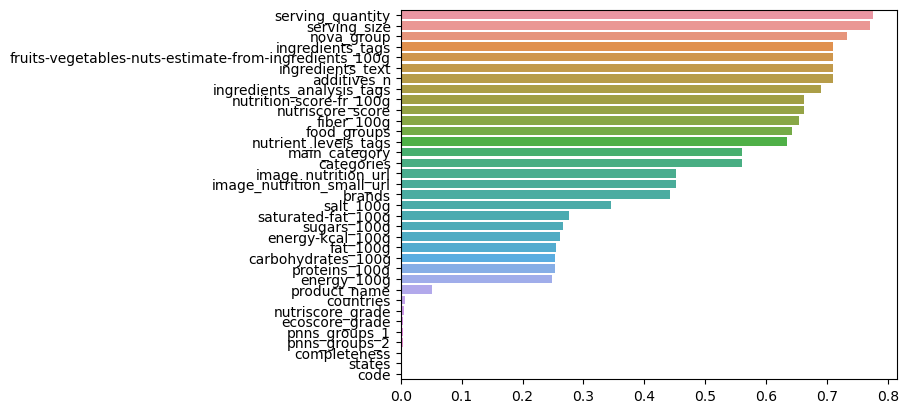

In [479]:
valeurs_manq = df.isna().mean().sort_values(ascending=False)
sns.barplot(x=valeurs_manq.values, y=valeurs_manq.index);

# Detection, modification et suppression des valeurs supérieures a 100 pour 100gr

In [481]:
def count_responses(results_df):
    return results_df.shape[0]

# Taille initiale du DataFrame
initial_size = df.shape[0]

# Liste des colonnes à vérifier
columns_to_check = [
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

# Initialiser une liste pour stocker les résultats
results = []

# Vérification des valeurs supérieures à 100 dans les colonnes spécifiées
for column in columns_to_check:
    # Convertir les valeurs de la colonne en float (si possible)
    df.loc[:, column] = pd.to_numeric(df[column], errors='coerce')
    values_above_100 = df[df[column] > 100][column]
    for idx, value in values_above_100.items():
        results.append((df.loc[idx, 'product_name'], column, value))

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame(results, columns=['product_name', 'Column', 'Value'])

# Afficher le DataFrame des résultats
print("Produits avec des valeurs supérieures à 100 :")
print(results_df)

# Compter le total de réponses
total_responses = count_responses(results_df)
print(f"Total de réponses trouvées : {total_responses}")

Produits avec des valeurs supérieures à 100 :
                     product_name  \
0                        blabblub   
1           Chicken Shawarma Bowl   
2              Asparagus, risotto   
3              Brown Sugar Salmon   
4                             Moz   
...                           ...   
7730  Just Juice orange and apple   
7731               deluxe mix nut   
7732      Grain free keto granola   
7733        Grain free berry Keto   
7734                  goodness me   

                                                 Column   Value  
0                                              fat_100g   222.0  
1                                              fat_100g   350.0  
2                                              fat_100g   610.0  
3                                              fat_100g  3400.0  
4                                              fat_100g   261.0  
...                                                 ...     ...  
7730  fruits-vegetables-nuts-estimate-from-ingr

In [482]:
unique_product_counts = df['product_name'].value_counts()
print("Valeurs uniques dans la colonne 'product_name' et leur nombre :")
print(unique_product_counts)

Valeurs uniques dans la colonne 'product_name' et leur nombre :
product_name
Miel                                             1827
Aceite de oliva virgen extra                     1632
Filet de poulet                                  1445
Spaghetti                                        1303
Chocolat                                         1253
                                                 ... 
Actimel mind guarana                                1
Actimel activate                                    1
Le petit Frais                                      1
Le petit frais gervais nature 3,9 % 60 g x 12       1
Light & Free SKYR A BOIRE                           1
Name: count, Length: 1928370, dtype: int64


In [483]:
columns_to_check = [
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

# Convertir les valeurs des colonnes en float (si possible)
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Calculer les moyennes des colonnes en fonction de 'product_name'
means = df.groupby('product_name')[columns_to_check].transform('mean')

# Remplacer les valeurs supérieures à 100 par la moyenne correspondante
for column in columns_to_check:
    df[column] = np.where(df[column] > 100, means[column], df[column])

# Vérifier les valeurs supérieures à 100 après correction
values_above_100 = df[columns_to_check] > 100
count_above_100 = values_above_100.sum().sum()
print(f"Nombre de valeurs supérieures à 100 après correction : {count_above_100}")

# Supprimer les lignes contenant des valeurs supérieures à 100
df.drop(index=df[values_above_100.any(axis=1)].index, inplace=True)

# Afficher le DataFrame modifié
print("DataFrame après suppression des valeurs supérieures à 100 :")
print(df)

Nombre de valeurs supérieures à 100 après correction : 6098
DataFrame après suppression des valeurs supérieures à 100 :
                           code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3287114              9999999999            Duschgel - Iris        NaN   
3287115             99999999999        Sugo alle Melanzone  La Vialla   
3287116            999999999999       Test Product Product        MTR   
3287117           9999999999994  Light & Free SKYR A BOIRE        NaN   
3287118           9999999999999                 Salatgurke      Edeka   

   

In [484]:
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Compteur pour les valeurs modifiées
modified_count = 0

# Utiliser IterativeImputer pour remplacer les NaN
imputer = IterativeImputer(random_state=0)
df_imputed = imputer.fit_transform(df[columns_to_check])

# Compter les valeurs modifiées
for col in columns_to_check:
    modified_count += df[col].isna().sum() - np.isnan(df_imputed[:, columns_to_check.index(col)]).sum()

# Remplacer les valeurs NaN dans le DataFrame d'origine
df[columns_to_check] = df_imputed

# Afficher le DataFrame final après imputation
print("DataFrame après imputation itérative :")
print(df)

# Afficher le nombre de valeurs modifiées
print(f"Nombre de valeurs modifiées : {modified_count}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


DataFrame après imputation itérative :
                           code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3287114              9999999999            Duschgel - Iris        NaN   
3287115             99999999999        Sugo alle Melanzone  La Vialla   
3287116            999999999999       Test Product Product        MTR   
3287117           9999999999994  Light & Free SKYR A BOIRE        NaN   
3287118           9999999999999                 Salatgurke      Edeka   

                                                categories   countries  \
0        A

In [486]:
for column in df.columns:
    if column == 'fruits-vegetables-nuts-estimate-from-ingredients_100g':  # Vérifier si la colonne est 'ecoscore_grade'
        unique_values = df[column].unique()
        print(f"Colonne '{column}':")
        for value in unique_values:
            print(f"  - {value}")
        print()  # Ajouter une ligne vide pour séparer les colonnes

Colonne 'fruits-vegetables-nuts-estimate-from-ingredients_100g':
  - 18.147514406075185
  - 4.342126541388698
  - 0.0
  - 24.03072646042593
  - 4.6627441272837125
  - 13.845433087337032
  - 17.324446211217932
  - 18.536274827759385
  - 29.537562060787916
  - 0.0266075134277344
  - 28.22145262868523
  - 26.462685003711687
  - 28.5643289000041
  - 27.152800574246207
  - 18.609168062145457
  - 28.99532439114975
  - 23.808586143149803
  - 23.219367349505404
  - 24.731156653785487
  - 9.230045754053574
  - 0.2927263550385639
  - 7.48614149165196
  - 17.493252895241657
  - 28.768055923904008
  - 27.074338287031264
  - 8.999325948581024
  - 23.086387306847968
  - 26.848114646071032
  - -1.3598487834270543
  - 30.57547425440658
  - 23.210009768111483
  - 25.309358375876727
  - 34.77626213320554
  - 19.5983766430579
  - 16.356167836189123
  - 10.463637587168929
  - 28.111910539164267
  - 28.251979476646945
  - 25.073203192190093
  - 20.42609129479731
  - 33.1875
  - 16.041549532244012
  - 29.14

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



  - 3.782385351457396
  - 18.661463974148578
  - -1.9563053867371316
  - 19.44901237977896
  - 10.298234536906087
  - 10.050070905594811
  - 10.409096945427578
  - 23.515126686390293
  - 8.120098521719282
  - 22.969789294396037
  - 5.990146811995359
  - 26.110060003557233
  - 1.1389511267448604
  - 23.879848489523194
  - 27.617339648039913
  - -1.1550673784448335
  - -0.08275441691379015
  - 2.7700556137962984
  - 6.097984207272713
  - 28.645399694327626
  - 11.954615163731944
  - 15.74362057913861
  - -3.4774157419231635
  - 11.996867331009422
  - 11.371214386999632
  - 6.529052612718225
  - 20.296696103825226
  - 25.45268966454645
  - 0.8274556482593205
  - 2.4149452693432494
  - 16.275709608244725
  - 136.01505885505458
  - 6.091822070399722
  - 25.35988646986241
  - 6.553985680181018
  - 30.320653406293285
  - 22.890155385448654
  - 23.377143302380766
  - 16.732610295661537
  - 6.227713622641918
  - 22.80328740198076
  - 31.314904279135526
  - 8.434394091814873
  - 7.11518892213688

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [507]:
# Calculer le pourcentage des valeurs égales à 0
zero_percentages = (df == 0).sum() / df.shape[0] * 100

# Calculer le pourcentage des NaN
nan_percentages = df.isna().sum() / df.shape[0] * 100

# Afficher les pourcentages
print("Pourcentage des valeurs égales à 0 :")
print(zero_percentages)
print("\nPourcentage des NaN :")
print(nan_percentages)

Pourcentage des valeurs égales à 0 :
code                                                      0.000000
product_name                                              0.000000
brands                                                    0.000000
categories                                                0.000000
countries                                                 0.000000
ingredients_text                                          0.000000
ingredients_tags                                          0.000000
ingredients_analysis_tags                                 0.000000
serving_size                                              0.000000
serving_quantity                                          0.132526
additives_n                                              12.657910
nutriscore_score                                          2.002735
nutriscore_grade                                          0.000000
nova_group                                                0.000000
pnns_groups_1            